# Implementasi K Means Clustering pada Python
Data yang akan digunakan adalah dataset ‘Mall Customer Segmentation’.
 
Dataset ini merupakan data customer suatu mall dan berisi basic informasi customer berupa : CustomerID, age, gender, annual income, dan spending score.  Adapun tujuan dari clustering adalah untuk memahami customer - customer mana saja yang sering melakukan transaksi sehingga informasi ini dapat diberikan kepada marketing team untuk membuat strategi promosi yang sesuai dengan karakteristik customer. 
 
Tahap penerapan K Means pada Python (bagian 1):
1.	Import pandas sebagai aliasnya dan KMeans dari sklearn.cluster.
2.	Load dataset 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/mall_customers.csv' dan beri nama dataset
3.	Diasumsikan EDA dan preprocessing sudah dilakukan, selanjutnya kita memilih feature yang akan digunakan untuk membuat model yaitu annual_income dan spending_score. Assign dataset dengan feature yang sudah dipilih ke dalam 'X'. Pada dasarnya terdapat teknik khusus yang dilakukan untuk menyeleksi feature - feature (Feature Selection) mana saja yang dapat digunakan untuk machine learning modelling, karena tidak semua feature itu berguna. Beberapa feature justru bisa menyebabkan performansi model menurun. Tetapi untuk problem ini, secara default kita akan menggunakan annual_income dan spending_score.
4.	Deklarasikan  KMeans( )  dengan nama cluster_model dan gunakan n_cluster = 5. n_cluster adalah argumen dari fungsi KMeans( ) yang merupakan jumlah cluster/centroid (K).  random_state = 24.
5.	Gunakan fungsi .fit_predict( ) dari cluster_model pada 'X'  untuk proses clustering.

In [17]:
#import library
import pandas as pd  
from sklearn.cluster import KMeans

#load dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/mall_customers.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:>

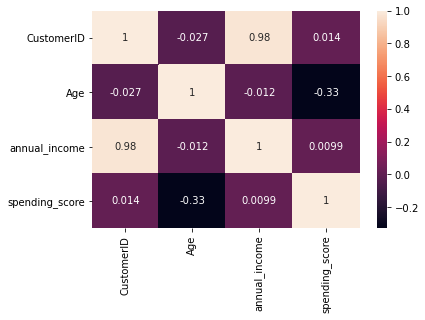

In [18]:
import seaborn as sns
sns.heatmap(dataset.corr(), annot=True)

In [23]:
#selecting features  
X = dataset[['annual_income','spending_score']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

Tahap penerapan K Means pada Python (bagian 2):
1. Pertama - tama, import matplotlib.pyplot dan beri inisial plt.
2. Gunakan fungsi .values untuk mengubah tipe ‘X’ dari dataframe menjadi array
3. Pisahkan X kedalam xs dan ys, di mana xs adalah Kolom index [0] dan ys adalah kolom index [1]
4. Buatlah scatter plot plt.scatter() dari xs dan ys, kemudian tambahkan c = labels untuk secara otomatis memberikan warna yang berbeda pada setiap cluster, dan alpha = 0.5 ke dalam scatter plot argumen.
5. Hitunglah koordinat dari centroid menggunakan .cluster_centers_ dari cluster_model, deklarasikan ke dalam variabel centroids.
6. Pisahkan centroids kedalam centroids_x dan centroids_y, di mana centroids_x adalah kolom index [0] dan centroids_y adalah kolom index [1]
7. Buatlah scatter plot dari centroids_x dan centroids_y , gunakan ‘D’ (diamond) sebagai marker parameter, dengan ukuran 50, s = 50

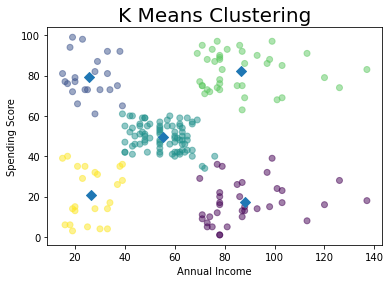

In [24]:
#import library
import matplotlib.pyplot as plt

#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Measuring Cluster Criteria
Bagaimana kita tahu bahwa membagi segmentasi ke dalam 5 cluster adalah segmentasi yang paling optimal? Karena jika dilihat pada gambar beberapa data point masih cukup jauh jaraknya dengan centroidnya.
 
 Clustering yang baik adalah cluster yang data point-nya saling rapat/sangat berdekatan satu sama lain dan cukup berjauhan dengan objek/data point di cluster yang lain. Jadi, objek dalam satu cluster tidak tersebut berjauhan. Nah, untuk mengukur kualitas dari clustering, kita bisa menggunakan inertia.
 
Inertia mengukur seberapa besar penyebaran object/data point data dalam satu cluster, semakin kecil nilai inertia maka semakin baik. Kita tidak perlu bersusah payah menghitung nilai inertia karena secara otomatis, telah dihitung oleh KMeans( ) ketika algorithm di fit ke dataset. Untuk mengecek nilai inertia cukup dengan print fungsi .inertia_ dari model yang sudah di fit ke dataset.
 
Kalau begitu, bagaimana caranya mengetahui nilai K yang paling baik dengan inertia yang paling kecil? Apakah harus trial Error dengan mencoba berbagai jumlah cluster?
Benar, kita perlu mencoba beberapa nilai, dan memplot nilai inertia-nya. Semakin banyak cluster maka inertia semakin kecil.

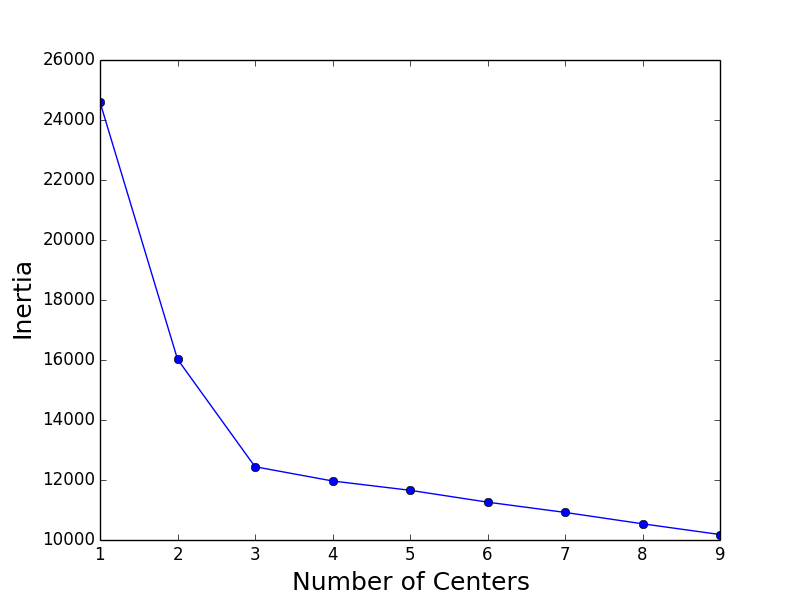

Meskipun suatu clustering dikatakan baik jika memiliki inertia yang kecil tetapi secara praktikal in real life, terlalu banyak cluster juga tidak diinginkan. Adapun rule untuk memilih jumlah cluster yang optimal adalah dengan memilih jumlah cluster yang terletak pada “elbow” dalam inertia plot, yaitu ketika nilai inertia mulai menurun secara perlahan. Jika dilihat pada gambar maka jumlah cluster yang optimal adalah K = 3.


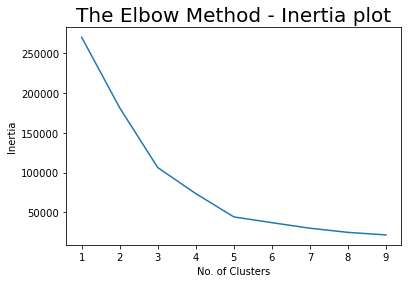

In [15]:
#import library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
    
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()
